<a href="https://colab.research.google.com/github/paulaRMachado/PUC-RIO-DTSC-MVP2/blob/main/PUC_MVP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MVP An√°lise de Dados e Boas Pr√°ticas**

**Nome**: Paula R A Machado

**Matr√≠cula**: 405205000163

**Dataset**: Indian Liver Patient Records

# Descri√ß√£o do Problema

O conjunto de dados *Indian Liver Patient Records* cont√©m informa√ß√µes de pacientes do nordeste de Andhra Pradesh, na √çndia, com o objetivo principal de prever a presen√ßa ou aus√™ncia de doen√ßas hep√°ticas. Para isso, o dataset re√∫ne medidas bioqu√≠micas como n√≠veis enzim√°ticos (ALT, AST), bilirrubina, prote√≠nas totais, albumina, al√©m de dados demogr√°ficos como idade e sexo. O objetivo deste projeto √© desenvolver uma base de dados limpa e preparada para fins de modelagem preditiva, com foco na detec√ß√£o de doen√ßa hep√°tica.

## Hip√≥teses do Problema

As hip√≥teses que tracei s√£o as seguintes:

* Pacientes com n√≠veis elevados de bilirrubina e enzimas hep√°ticas (AST, ALT) t√™m maior probabilidade de apresentar doen√ßa hep√°tica.

* Existe rela√ß√£o entre o n√≠vel de albumina e a presen√ßa da doen√ßa hep√°tica?

* Pacientes mais velhos tendem a apresentar um risco maior para o desenvolvimento de doen√ßa hep√°tica?

* Medidas como a propor√ß√£o entre albumina e globulina s√£o bons indicadores para diferenciar pacientes saud√°veis de doentes?

## Tipo de Problema

Este √© um problema de **classifica√ß√£o supervisionada**.

Dado um conjunto de caracter√≠sticas laboratoriais e demogr√°ficas (como n√≠veis de bilirrubina, enzimas hep√°ticas, prote√≠nas, idade e sexo), o objetivo √© prever se um paciente possui doen√ßa hep√°tica ou n√£o. O resultado desejado √© classificar cada paciente em uma das duas classes: doente ou saud√°vel.

## Sele√ß√£o de Dados

O dataset *Indian Liver Patient Records* foi obtido do reposit√≥rio Kaggle e cont√©m informa√ß√µes laboratoriais e demogr√°ficas de pacientes com e sem doen√ßas hep√°ticas. Por se tratar de um dataset real e n√£o-curado, foi necess√°rio carregar o arquivo CSV bruto e inspecionar a estrutura para verificar a qualidade dos dados antes da an√°lise. Nessa etapa inicial, todos os atributos ser√£o utilizados, pois s√£o potencialmente relevantes para o problema e n√£o h√° necessidade de filtragem pr√©via de colunas.

## Atributos do Dataset

O dataset *Indian Liver Patient Records* cont√©m 583 amostras, sendo 416 de pacientes COM doen√ßa hep√°tica e 167 de pacientes SEM doen√ßa hep√°tica. H√° 11 atributos:

- **Age**: Idade do paciente
- **Gender**: Sexo do Paciente
- **Total Bilirubin**: Bilirrubina Total (mg/dL)
- **Direct Bilirubin**: Bilirrubina Conjugada (mg/dL)
- **Alkaline Phosphotase**: Fosfatase Alcalina (UI/L)
- **Alamine Aminotransferase**: Alanina Aminotransferase (UI/L)
- **Aspartate Aminotransferase**: Aspartato Aminotransferase (UI/L)
- **Total Protiens**: Prote√≠nas Totais (g/dL)
- **Albumin**: Albumina (g/dL)
- **Albumin and Globulin Ratio**: Raz√£o Albumina/Globulina (%)
- **Dataset**: Estado hep√°tico (com doen√ßa hep√°tica ou saud√°vel)

| Nome da Coluna               | Descri√ß√£o                                 | Tipo       | Unidade/Observa√ß√µes                      |
| ---------------------------- | ----------------------------------------- | ---------- | ---------------------------------------- |
| `Age`                        | Idade do paciente                         | Num√©rica   | Anos                                     |
| `Gender`                     | Sexo do paciente                          | Categ√≥rica | "Male" (masculino), "Female" (feminino)  |
| `Total_Bilirubin`            | Bilirrubina total no sangue               | Num√©rica   | mg/dL                                    |
| `Direct_Bilirubin`           | Bilirrubina conjugada (direta)            | Num√©rica   | mg/dL                                    |
| `Alkaline_Phosphotase`       | N√≠vel de fosfatase alcalina               | Num√©rica   | UI/L (Unidades Internacionais por Litro) |
| `Alamine_Aminotransferase`   | N√≠vel de alanina aminotransferase (ALT)   | Num√©rica   | UI/L                                     |
| `Aspartate_Aminotransferase` | N√≠vel de aspartato aminotransferase (AST) | Num√©rica   | UI/L                                     |
| `Total_Protiens`             | Quantidade total de prote√≠nas no sangue   | Num√©rica   | g/dL                                     |
| `Albumin`                    | N√≠vel de albumina no sangue               | Num√©rica   | g/dL                                     |
| `Albumin_and_Globulin_Ratio` | Raz√£o entre albumina e globulina          | Num√©rica   | Percentual (%)                           |
| `Dataset`                    | Indica o estado hep√°tico do paciente      | Num√©rica | 1 = Doente, 2 = Saud√°vel                 |


##Bibliotecas necess√°rias e carga de dados

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [39]:
# Camada Bronze ‚Äì Dados Brutos carregados diretamente do reposit√≥rio
url = "https://raw.githubusercontent.com/paulaRMachado/PUC-RIO-DTSC-MVP2/refs/heads/main/indian_liver_patient.csv"
bronze = pd.read_csv(url)

In [40]:
# visualiza√ß√£o das primeiras linhas
bronze.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1  
1      3.2                        0.74        1  
2      3.3                        0.89        1  
3      3.4                        1.00        1  
4      2.4                        0.40        1

#An√°lise de Dados

##Total e Tipo das Inst√¢ncias

In [41]:
# Informa√ß√µes sobre a estrutura do dataset
bronze.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


O dataset cont√©m 583 amostras e 11 atributos, sendo 10 num√©ricos e apenas um categ√≥rico (Gender). Todos os campos est√£o completos, exceto Albumin_and_Globulin_Ratio, que tem 4 valores ausentes. O alvo (Dataset) est√° codificado numericamente e o consumo de mem√≥ria √© baixo (~50 KB), facilitando o processamento.

In [42]:
# Altera√ß√£o dos nomes das vari√°veis
novos_nomes = {
    'Age': 'Idade',
    'Gender': 'Sexo',
    'Total_Bilirubin': 'Bilirrubina Total (mg/dL)',
    'Direct_Bilirubin': 'Bilirrubina Conjugada (mg/dL)',
    'Alkaline_Phosphotase': 'Fosfatase Alcalina (UI/L)',
    'Alamine_Aminotransferase': 'Alanina Aminotransferase (UI/L)',
    'Aspartate_Aminotransferase': 'Aspartato Aminotransferase (UI/L)',
    'Total_Protiens': 'Prote√≠nas Totais (g/dL)',
    'Albumin': 'Albumina (g/dL)',
    'Albumin_and_Globulin_Ratio': 'Raz√£o Albumina/Globulina (%)',
    'Dataset': 'Estado hep√°tico'
}

bronze = bronze.rename(columns=novos_nomes)
bronze.head()

Idade    Sexo  Bilirrubina Total (mg/dL)  Bilirrubina Conjugada (mg/dL)  \
0     65  Female                        0.7                            0.1   
1     62    Male                       10.9                            5.5   
2     62    Male                        7.3                            4.1   
3     58    Male                        1.0                            0.4   
4     72    Male                        3.9                            2.0   

   Fosfatase Alcalina (UI/L)  Alanina Aminotransferase (UI/L)  \
0                        187                               16   
1                        699                               64   
2                        490                               60   
3                        182                               14   
4                        195                               27   

   Aspartato Aminotransferase (UI/L)  Prote√≠nas Totais (g/dL)  \
0                                 18                      6.8   
1                                100                      7.5   
2                                 68                      7.0   
3                                 20                      6.8   
4                                 59                      7.3   

   Albumina (g/dL)  Raz√£o Albumina/Globulina (%)  Estado hep√°tico  
0              3.3                          0.90                1  
1              3.2                          0.74                1  
2              3.3                          0.89                1  
3              3.4                          1.00                1  
4              2.4                          0.40                1

In [43]:
print(f'Moda de Idade: {statistics.mode(bronze["Idade"])}')
print(f'Moda de Sexo: {statistics.mode(bronze["Sexo"])}')
print(f'Moda de Bilirrubina Total: {statistics.mode(bronze["Bilirrubina Total (mg/dL)"])}')
print(f'Moda de Bilirrubina Conjugada: {statistics.mode(bronze["Bilirrubina Conjugada (mg/dL)"])}')
print(f'Moda de Fosfatase Alcalina: {statistics.mode(bronze["Fosfatase Alcalina (UI/L)"])}')
print(f'Moda de Alanina Aminotransferase: {statistics.mode(bronze["Alanina Aminotransferase (UI/L)"])}')
print(f'Moda de Aspartato Aminotransferase: {statistics.mode(bronze["Aspartato Aminotransferase (UI/L)"])}')
print(f'Moda de Prote√≠nas Totais: {statistics.mode(bronze["Prote√≠nas Totais (g/dL)"])}')
print(f'Moda de Albumina: {statistics.mode(bronze["Albumina (g/dL)"])}')
print(f'Moda de Raz√£o Albumina/Globulina: {statistics.mode(bronze["Raz√£o Albumina/Globulina (%)"])}')
print(f'Moda de Estado Hep√°tico: {statistics.mode(bronze["Estado hep√°tico"])}')

Moda de Idade: 60
Moda de Sexo: Male
Moda de Bilirrubina Total: 0.8
Moda de Bilirrubina Conjugada: 0.2
Moda de Fosfatase Alcalina: 198
Moda de Alanina Aminotransferase: 25
Moda de Aspartato Aminotransferase: 23
Moda de Prote√≠nas Totais: 7.0
Moda de Albumina: 3.0
Moda de Raz√£o Albumina/Globulina: 1.0
Moda de Estado Hep√°tico: 1


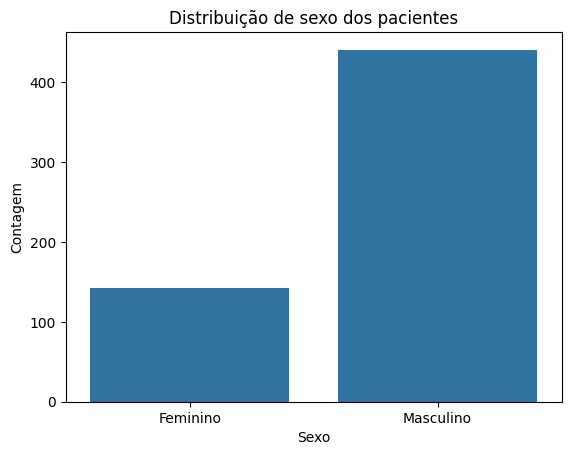

In [44]:
"""
Distribui√ß√£o de pacientes quanto ao sexo
Utilizei o m√©todo map para facilitar o entendimento do gr√°fico uma vez que o atributo est√° em ingl√™s.
"""
sns.countplot(x=bronze['Sexo'].map({'Male': 'Masculino', 'Female': 'Feminino'}))
plt.title('Distribui√ß√£o de sexo dos pacientes')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.show()



O gr√°fico de barras mostra a distribui√ß√£o dos pacientes de acordo com o sexo. Observa-se um claro desbalanceamento entre os g√™neros, com predomin√¢ncia de pacientes do sexo masculino em rela√ß√£o ao feminino.

Essa diferen√ßa pode refletir caracter√≠sticas da amostra ou um vi√©s na coleta dos dados.

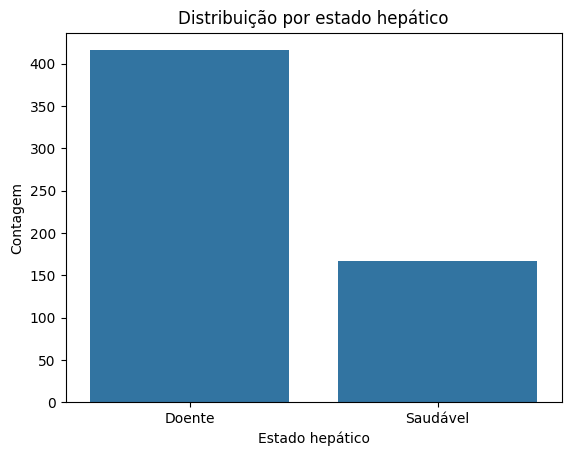

In [45]:
"""
Distribui√ß√£o de pacientes quanto ao estado hep√°tico
Utilizei o m√©todo map para facilitar o entendimento do gr√°fico uma vez que o atributo j√° est√° codificado numericamente.
"""
sns.countplot(x=bronze['Estado hep√°tico'].map({1: 'Doente', 2: 'Saud√°vel'}))
plt.title('Distribui√ß√£o por estado hep√°tico')
plt.xlabel('Estado hep√°tico')
plt.ylabel('Contagem')
plt.show()


O gr√°fico mostra a distribui√ß√£o dos pacientes de acordo com o seu estado hep√°tico. Observa-se que a maior parte dos registros corresponde a pacientes com doen√ßa hep√°tica, totalizando aproximadamente 420 casos, enquanto cerca de 165 pacientes est√£o classificados como saud√°veis. Essa diferen√ßa aponta um **desequil√≠brio na vari√°vel alvo**, o que pode impactar negativamente o desempenho de modelos preditivos. Esse tipo de desequil√≠brio justifica a necessidade de t√©cnicas de balanceamento, como o SMOTE, a fim de garantir que o modelo seja capaz de aprender padr√µes representativos para ambas as classes.

## Estat√≠sticas descritivas

In [46]:
# Estat√≠sticas dos dados num√©ricos
bronze.describe()

Idade  Bilirrubina Total (mg/dL)  Bilirrubina Conjugada (mg/dL)  \
count  583.000000                 583.000000                     583.000000   
mean    44.746141                   3.298799                       1.486106   
std     16.189833                   6.209522                       2.808498   
min      4.000000                   0.400000                       0.100000   
25%     33.000000                   0.800000                       0.200000   
50%     45.000000                   1.000000                       0.300000   
75%     58.000000                   2.600000                       1.300000   
max     90.000000                  75.000000                      19.700000   

       Fosfatase Alcalina (UI/L)  Alanina Aminotransferase (UI/L)  \
count                 583.000000                       583.000000   
mean                  290.576329                        80.713551   
std                   242.937989                       182.620356   
min                    63.000000                        10.000000   
25%                   175.500000                        23.000000   
50%                   208.000000                        35.000000   
75%                   298.000000                        60.500000   
max                  2110.000000                      2000.000000   

       Aspartato Aminotransferase (UI/L)  Prote√≠nas Totais (g/dL)  \
count                         583.000000               583.000000   
mean                          109.910806                 6.483190   
std                           288.918529                 1.085451   
min                            10.000000                 2.700000   
25%                            25.000000                 5.800000   
50%                            42.000000                 6.600000   
75%                            87.000000                 7.200000   
max                          4929.000000                 9.600000   

       Albumina (g/dL)  Raz√£o Albumina/Globulina (%)  Estado hep√°tico  
count       583.000000                    579.000000       583.000000  
mean          3.141852                      0.947064         1.286449  
std           0.795519                      0.319592         0.452490  
min           0.900000                      0.300000         1.000000  
25%           2.600000                      0.700000         1.000000  
50%           3.100000                      0.930000         1.000000  
75%           3.800000                      1.100000         2.000000  
max           5.500000                      2.800000         2.000000

A maioria das vari√°veis parece apresentar grande variabilidade apresentando o  coeficiente de varia√ß√£o bem acima de 1, como **Fosfatase Alcalina**, **Alanina Aminotransferase** e **Aspartato Aminotransferase**.

H√° valores m√°ximos extremamente distantes da m√©dia em v√°rias colunas como por exemplo, **Aspartato Aminotransferase** vai at√© 4.929 contra uma m√©dia de  aproximadamente 110, o que indica a presen√ßa de outliers.

Algumas vari√°veis t√™m uma distribui√ß√£o assim√©trica, pois a mediana √© bem menor que a m√©dia, como em **Bilirrubina Total** e **Bilirrubina Conjugada**, sugerindo que poucos casos com n√≠veis muito altos est√£o puxando a m√©dia para cima.



##Histogramas
Os histogramas mstram a distribui√ß√£o das vari√°veis num√©ricas presentes no dataset. Observa-se que algumas vari√°veis, como **Idade**, **Albumina** e **Prote√≠nas Totais**, apresentam uma distribui√ß√£o aproximadamente sim√©trica ou levemente normal, o que pode favorecer alguns modelos estat√≠sticos.

Por outro lado, vari√°veis como **Bilirrubina Total**, **Bilirrubina Conjugada**, **Fosfatase Alcalina**, **Alanina Aminotransferase (ALT)** e **Aspartato Aminotransferase (AST)** apresentam uma distribui√ß√£o altamente assim√©trica √† direita, com presen√ßa de valores extremos (outliers). Isso pode impactar o desempenho de modelos sens√≠veis a escalas.

A vari√°vel Raz√£o Albumina/Globulina (%) tamb√©m apresenta leve assimetria. Isto posto, seria aadequado aplicar t√©cnicas de padroniza√ß√£o para reduzir o impacto de outliers e permitir melhor desempenho dos algoritmos de aprendizado de m√°quina.

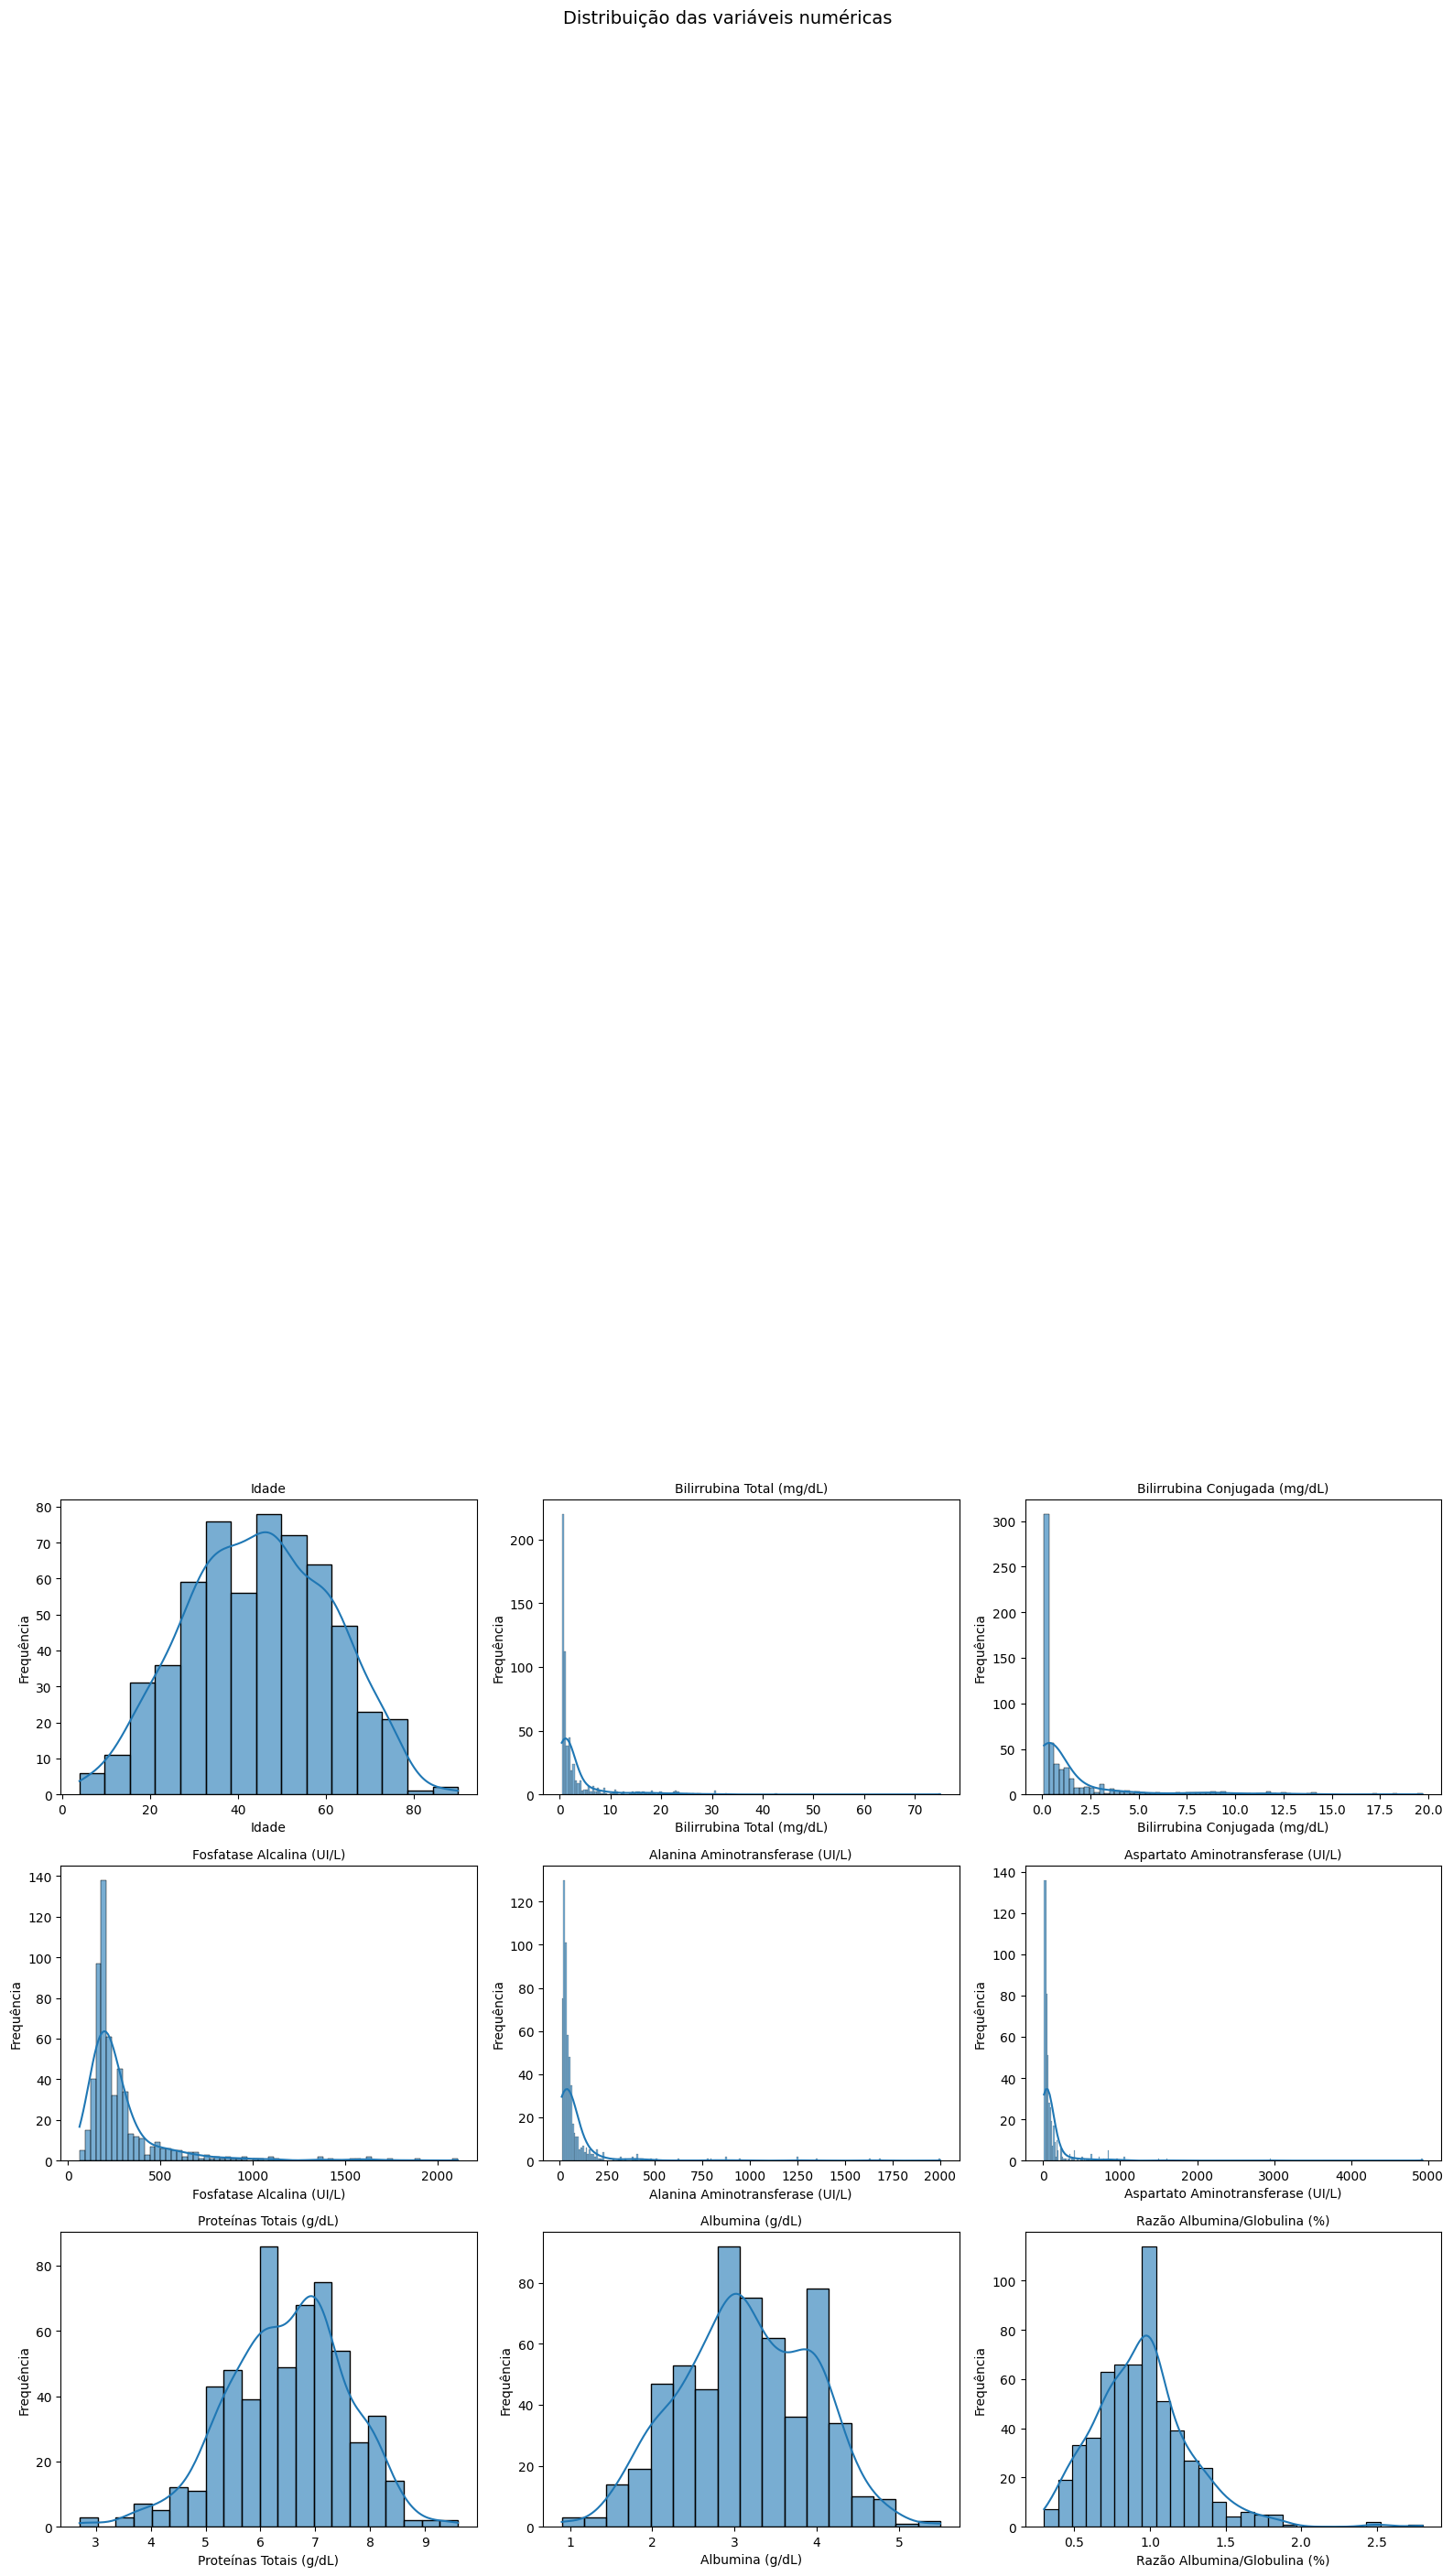

In [47]:
# Mapeando os valores num√©ricos para facilitar a leitura dos gr√°ficos
bronze['Estado hep√°tico'] = bronze['Estado hep√°tico'].map({1: 'Doente', 2: 'Saud√°vel'})

# Selecionando apenas colunas num√©ricas exceto Dataset
bronze_numbers = bronze.select_dtypes(include=['int64', 'float64'])

# Calcula o n√∫mero de linhas da grade automaticamente
num_cols = len(bronze_numbers)
num_rows = math.ceil(num_cols / 3)

plt.figure(figsize=(16, 4 * num_rows))

for i, col in enumerate(bronze_numbers, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(
        data=bronze,
        x=col,
        kde=True,
        alpha=0.6
    )
    plt.title(col, fontsize=10)
    plt.xlabel(col)
    plt.ylabel('Frequ√™ncia')

plt.suptitle('Distribui√ß√£o das vari√°veis num√©ricas', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

##Boxplot
Os boxplots apresentam as vari√°veis num√©ricas comparadas entre os grupos "Doente" e "Saud√°vel", com base no estado hep√°tico dos pacientes.

Observa-se que vari√°veis como **Bilirrubina Total**, **Bilirrubina Conjugada**, **Fosfatase Alcalina**, **Alanina Aminotransferase (ALT)** e **Aspartato Aminotransferase (AST)** apresentam valores medianos mais elevados no grupo de pacientes doentes, al√©m de grande variabilidade e presen√ßa significativa de outliers, indicando potencial associa√ß√£o com a doen√ßa hep√°tica.

J√° vari√°veis como **Albumina**, **Prote√≠nas Totais** e **Raz√£o Albumina/Globulina (%)** tendem a apresentar valores ligeiramente mais altos no grupo saud√°vel, o que pode indicar seu valor na diferencia√ß√£o entre os estados cl√≠nicos.

A presen√ßa de distribui√ß√µes assim√©tricas e valores extremos refor√ßa a necessidade de utiliza√ß√£o de t√©cnicas de escalonamento e poss√≠veis transforma√ß√µes. Al√©m disso, esse comportamento pode indicar vari√°veis com poder discriminativo importantes para o modelo preditivo.

---

üö® Optei por exibir os gr√°ficos separando por estado hep√°tico para entender se os outliers seriam decorrentes de doente hep√°tica aguda ou n√£o.

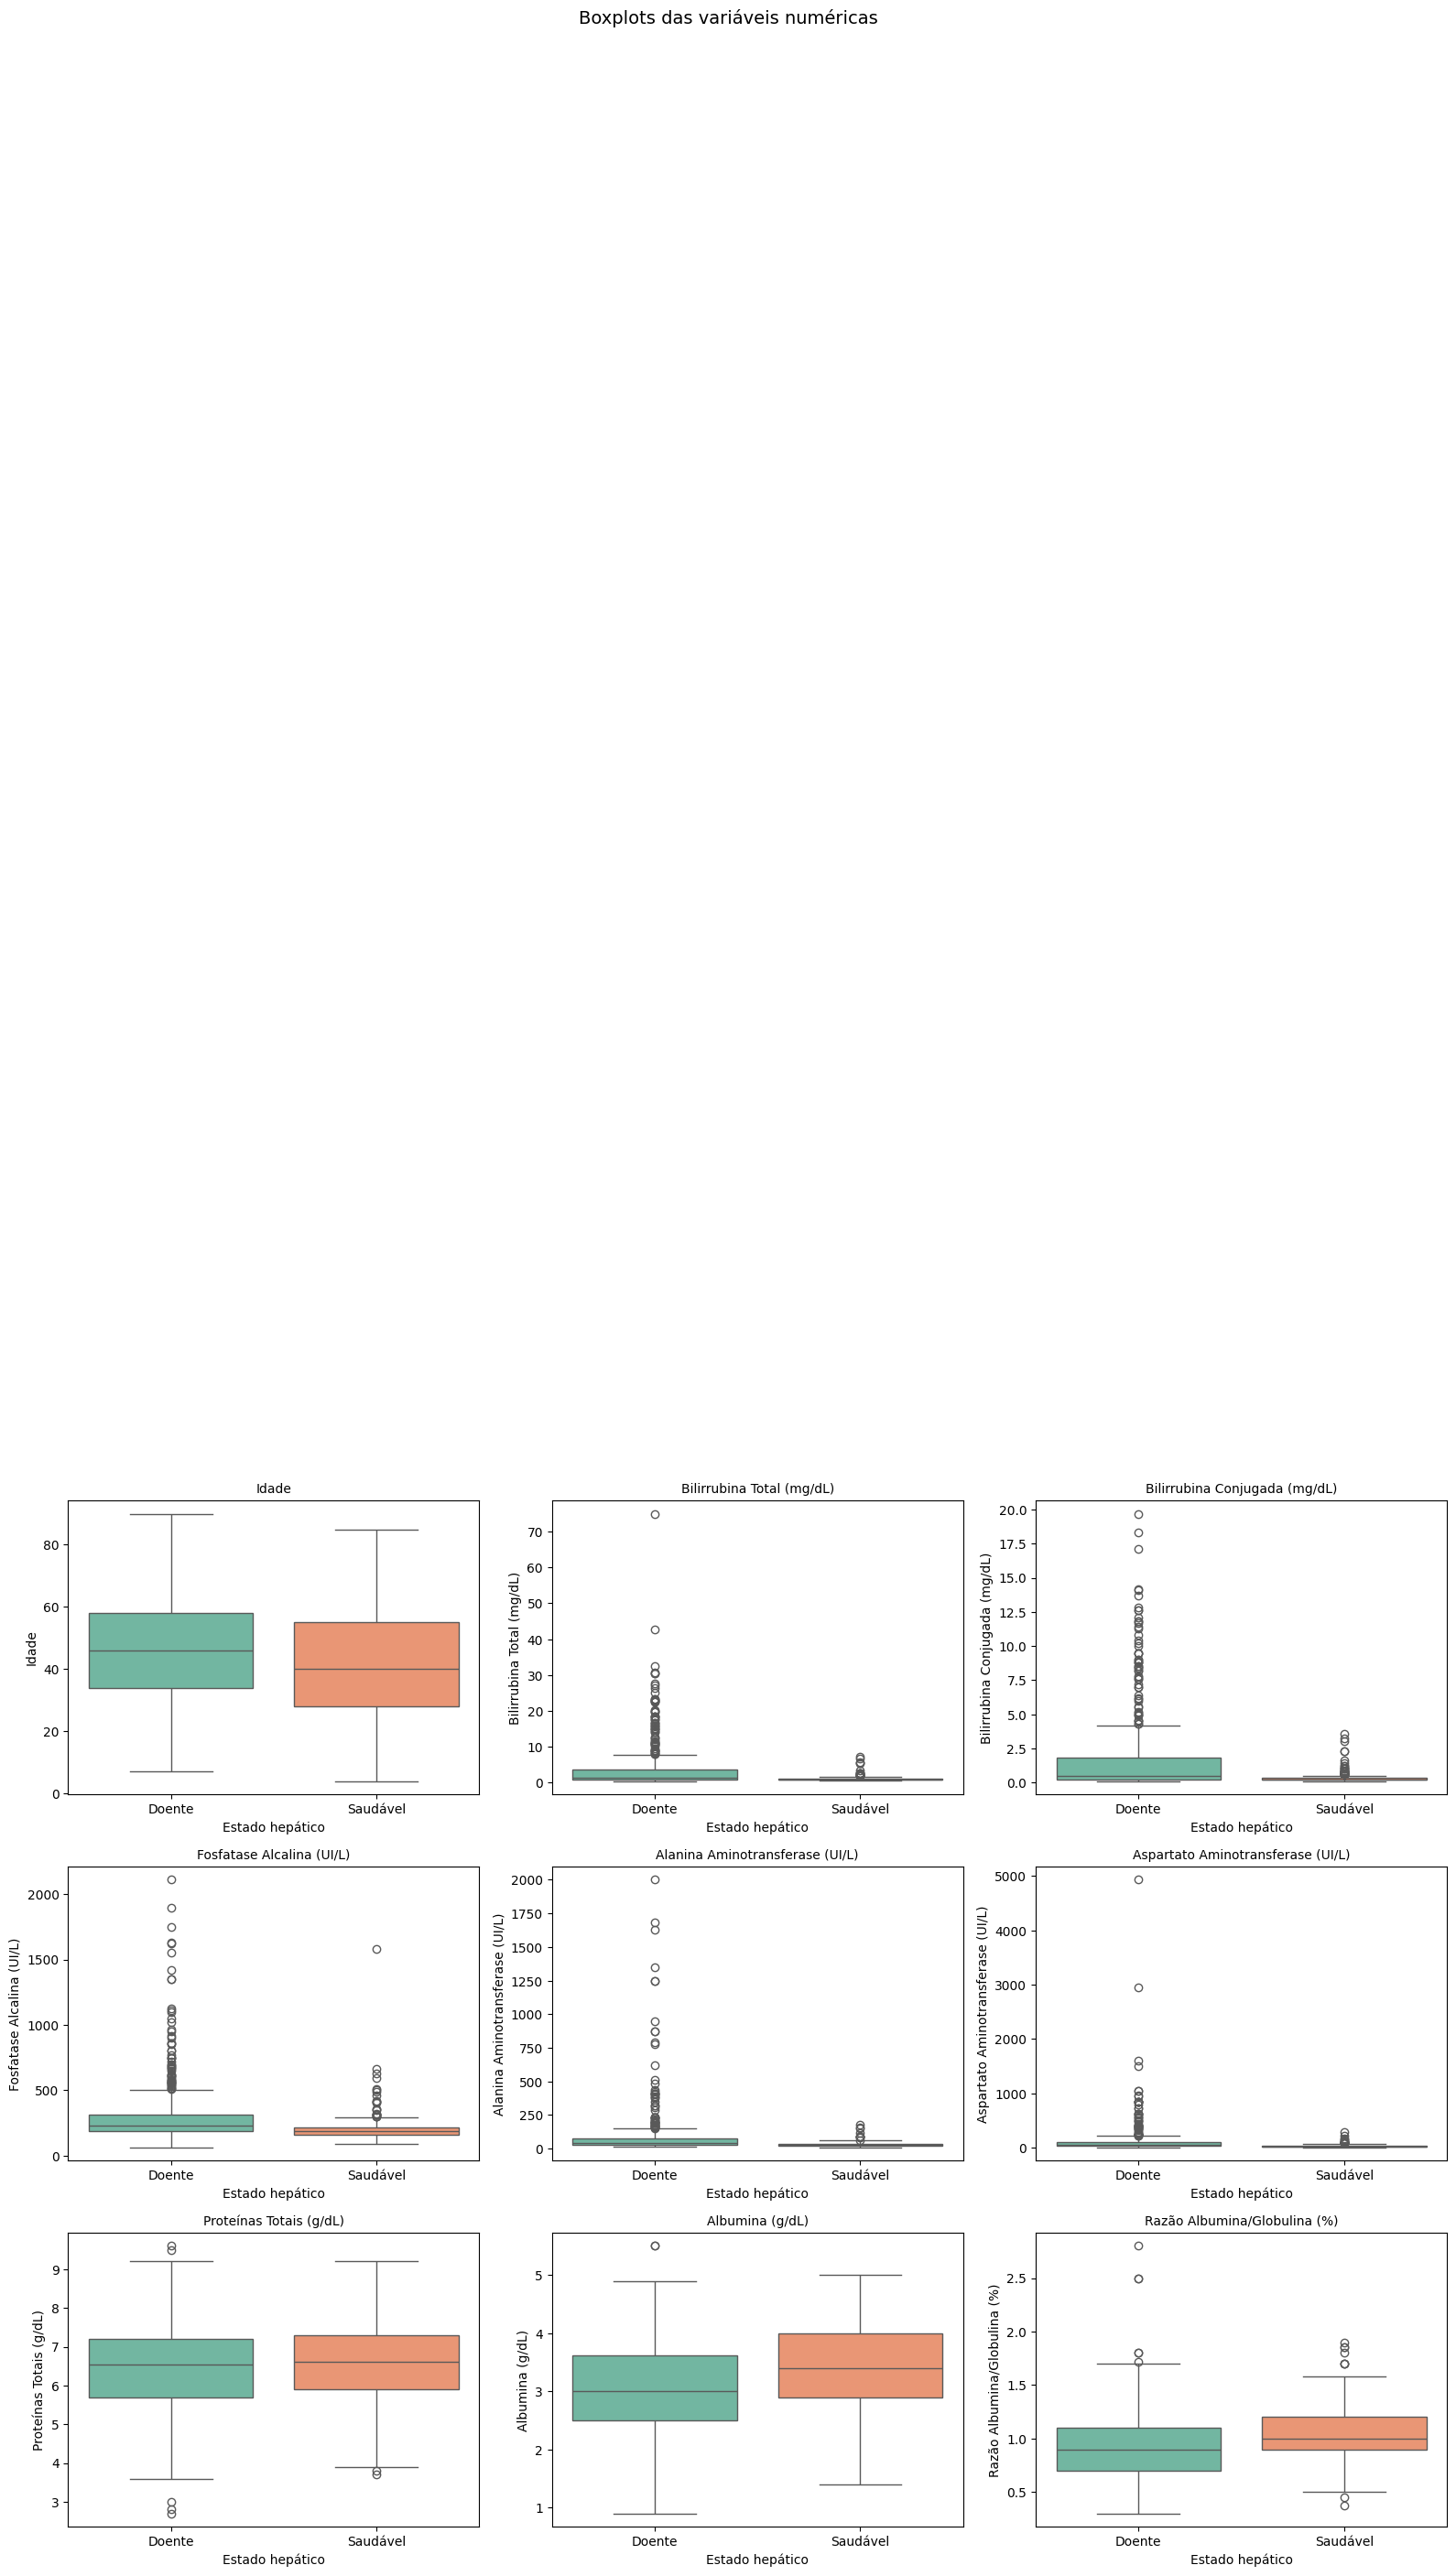

In [48]:
plt.figure(figsize=(16, 4 * num_rows))
for i, col in enumerate(bronze_numbers, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(
        data=bronze,
        x='Estado hep√°tico',
        y=col,
        hue='Estado hep√°tico', palette='Set2',
        legend=False)
    plt.title(col, fontsize=10)

plt.suptitle('Boxplots das vari√°veis num√©ricas', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()


###Outliers

Como outliers em contextos m√©dicos podem indicar apenas a ocorr√™ncia de casos graves, as vari√°veis que apresentam esses elementos que causam distor√ß√£o ser√£o tratados por outros meios.

## Correla√ß√£o

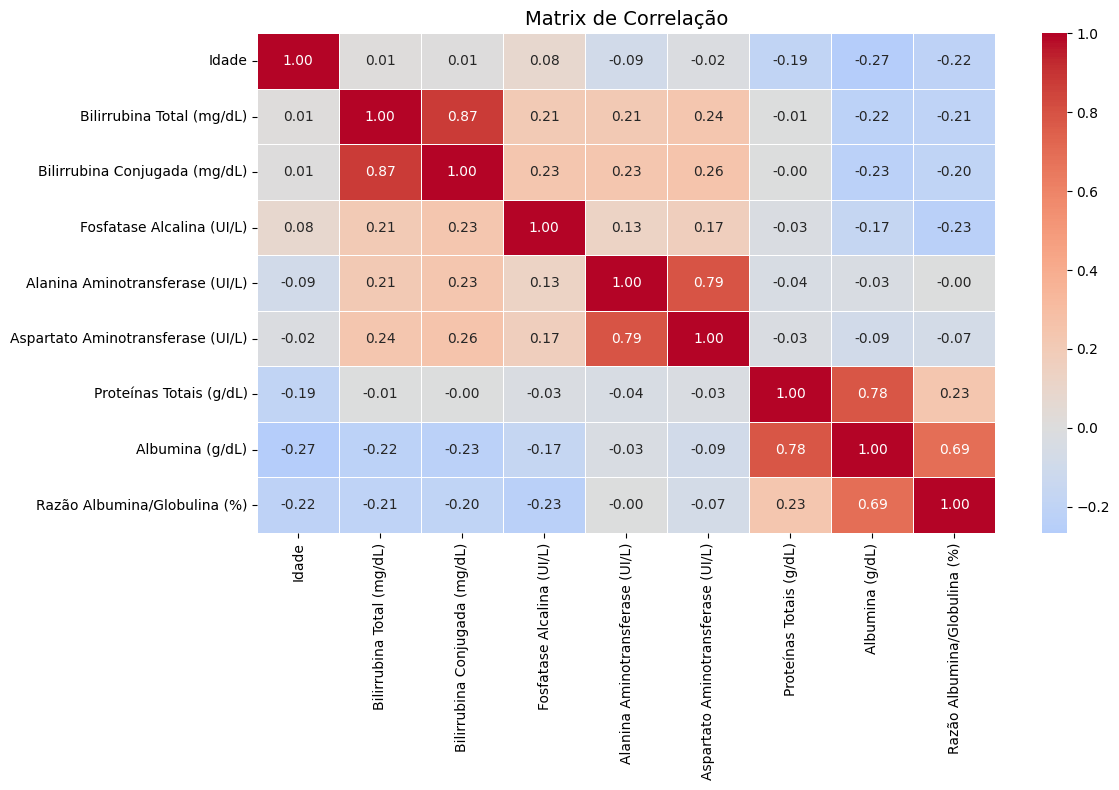

In [49]:
# Seleciona apenas colunas num√©ricas da camada bronze
bronze_numeric = bronze.select_dtypes(include=['int64', 'float64'])

# Calcula a matriz de correla√ß√£o
correlation_matrix = bronze_numeric.corr()
plt.figure(figsize=(12, 8))
# Cria o mapa de calor com anota√ß√µes
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)


# T√≠tulo
plt.title('Matrix de Correla√ß√£o', fontsize=14)
plt.tight_layout()
plt.show()


Observa-se forte correla√ß√£o, em 4 pontos da matriz entre:
* Bilirrubina Total e Bilirrubina Conjugada, com *0.87*;
* Alanina Aminotransferase e Aspartato Aminotransferase, com *0.79*;
* Prote√≠nas Totais e Albimuna, com *0.78*;
* Albumina e Raz√£o Albumina/Globulina, com *0.69*.

Visto que o Prote√≠nas Totais √© composto por Albumina + Globulina, ser√° importante tratar essa rela√ß√£o.
O mesmo se aplica a rela√ß√£o de Bilirrubina total e conjugada, sendo uma parte da composi√ß√£o da outra.

##Tratamento de Valores Nulos
Havia apenas 4 amostras com valores nulos para Raz√£o Albumina/Globulina (%). Optei por remov√™-las do modelo.

In [50]:
# Remo√ß√£o de possiveis dados duplicados e amostras sem dados para Albumin_and_Globulin_Ratio
bronze.drop_duplicates(inplace=True)
bronze.dropna(inplace=True)

#Pr√©-processamento

In [51]:
# Camada Silver ‚Äì Dados limpos e pr√©-processados
silver = bronze
silver.head()

Idade    Sexo  Bilirrubina Total (mg/dL)  Bilirrubina Conjugada (mg/dL)  \
0     65  Female                        0.7                            0.1   
1     62    Male                       10.9                            5.5   
2     62    Male                        7.3                            4.1   
3     58    Male                        1.0                            0.4   
4     72    Male                        3.9                            2.0   

   Fosfatase Alcalina (UI/L)  Alanina Aminotransferase (UI/L)  \
0                        187                               16   
1                        699                               64   
2                        490                               60   
3                        182                               14   
4                        195                               27   

   Aspartato Aminotransferase (UI/L)  Prote√≠nas Totais (g/dL)  \
0                                 18                      6.8   
1                                100                      7.5   
2                                 68                      7.0   
3                                 20                      6.8   
4                                 59                      7.3   

   Albumina (g/dL)  Raz√£o Albumina/Globulina (%) Estado hep√°tico  
0              3.3                          0.90          Doente  
1              3.2                          0.74          Doente  
2              3.3                          0.89          Doente  
3              3.4                          1.00          Doente  
4              2.4                          0.40          Doente

###Feature Engineering

Foi necess√°ria a adapta√ß√£o de algumas vari√°vies.

Devido √† alta correla√ß√£o observada entre as vari√°veis Albumina (g/dL) e Raz√£o Albumina/Globulina (%), foi criada uma nova coluna denominada **Globulina** (g/dL), a partir da rela√ß√£o matem√°tica entre essas vari√°veis, onde: Raz√£o = Albumina / Globulina. A substitui√ß√£o da raz√£o por essa nova vari√°vel visa reduzir a multicolinearidade e aumentar a efici√™ncia dos modelos preditivos, proporcionando ao modelo uma vari√°vel adicional com significado cl√≠nico direto, o que pode favorecer a aprendizagem de padr√µes mais robustos na classifica√ß√£o do estado hep√°tico dos pacientes.

Apesar da alta correla√ß√£o entre as enzimas hep√°ticas **Alanina Aminotransferase (ALT)** e **Aspartato Aminotransferase (AST)**, ambas foram mantidas na an√°lise inicial, pois podem carregar informa√ß√µes distintas relevantes para o modelo. Como alternativa, foi criada a **Raz√£o AST/ALT**, com base em literatura m√©dica, para melhor representar padr√µes cl√≠nicos associados a doen√ßas hep√°ticas. Essa abordagem evita perdas de informa√ß√£o e reduz o risco de multicolinearidade.

Optou-se por manter a vari√°vel **Bilirrubina Conjugada** em vez da **Bilirrubina Total**, uma vez que a forma conjugada representa diretamente a capacidade funcional. Como o objetivo do modelo √© identificar a presen√ßa de doen√ßa hep√°tica, essa vari√°vel oferece maior especificidade cl√≠nica. A **Bilirrubina Total** foi descartada por conter componentes n√£o diretamente relacionados √† fun√ß√£o hep√°tica, o que poderia introduzir ru√≠do no modelo.

In [52]:
# Cria√ß√£o do atributo Globulina a partir de Raz√£o Albumina/Globulina (%)
silver['globulina'] = silver['Albumina (g/dL)']/silver['Raz√£o Albumina/Globulina (%)']
# Cria√ß√£o do atributo Raz√£o AST/ALT a partir
silver['Raz√£o AST/ALT'] = silver['Aspartato Aminotransferase (UI/L)'] / silver['Alanina Aminotransferase (UI/L)']

### One-hot encoding
A codifica√ß√£o one-hot converte dados categ√≥ricos em um formato bin√°rio em que cada categoria √© representada por uma coluna separada com um 1 indicando sua presen√ßa e 0s para todas as outras categorias. Ao utilizar os parametros *drop='first', sparse_output=False* resta apenas uma coluna, otimizando a execu√ß√£o.

In [53]:
# Ajustar e transformar as colunas Sexo e Estado hep√°tico
encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded = encoder.fit_transform(silver[['Sexo']])
silver['Sexo_encoded'] = encoded.astype(int)

encoded = encoder.fit_transform(silver[['Estado hep√°tico']])
silver['Estado_encoded'] = encoded.astype(int)


In [54]:
silver = silver.drop(columns=['Raz√£o Albumina/Globulina (%)','Sexo','Prote√≠nas Totais (g/dL)','Bilirrubina Total (mg/dL)','Alanina Aminotransferase (UI/L)','Aspartato Aminotransferase (UI/L)','Estado hep√°tico'])

In [55]:
silver.head()

Idade  Bilirrubina Conjugada (mg/dL)  Fosfatase Alcalina (UI/L)  \
0     65                            0.1                        187   
1     62                            5.5                        699   
2     62                            4.1                        490   
3     58                            0.4                        182   
4     72                            2.0                        195   

   Albumina (g/dL)  globulina  Raz√£o AST/ALT  Sexo_encoded  Estado_encoded  
0              3.3   3.666667       1.125000             0               0  
1              3.2   4.324324       1.562500             1               0  
2              3.3   3.707865       1.133333             1               0  
3              3.4   3.400000       1.428571             1               0  
4              2.4   6.000000       2.185185             1               0

### Dicion√°rio de Dados Finais

| Nome da Coluna                      | Descri√ß√£o                                                  | Tipo     | Unidade/Observa√ß√µes                                   |
| ----------------------------------- | ---------------------------------------------------------- | -------- | ----------------------------------------------------- |
| `Idade`                             | Idade do paciente                                          | Num√©rica | Anos                                                  |
| `Sexo_encoded`                      | Sexo do paciente codificado                                | Num√©rica | 0 = Feminino, 1 = Masculino                           |
| `Bilirrubina Conjugada (mg/dL)`     | Bilirrubina conjugada (direta) no sangue                   | Num√©rica | mg/dL                                                 |
| `Fosfatase Alcalina (UI/L)`         | N√≠vel de fosfatase alcalina                                | Num√©rica | UI/L (Unidades Internacionais por Litro)              |
| `Albumina (g/dL)`                   | N√≠vel de albumina no sangue                                | Num√©rica | g/dL                                                  |
| `globulina`                         | Valor calculado da globulina (prote√≠nas totais - albumina) | Num√©rica | g/dL                                                  |
| `Raz√£o AST/ALT`                     | Raz√£o entre AST e ALT (AST/ALT)                            | Num√©rica | Percentual (%)                                                     |
| `Estado_encoded`                    | Vari√°vel-alvo: estado hep√°tico codificado                  | Num√©rica | 0 = Saud√°vel, 1 = Doente (aprendizado supervisionado) |


In [56]:
X = silver.drop('Estado_encoded', axis=1)
y = silver['Estado_encoded']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

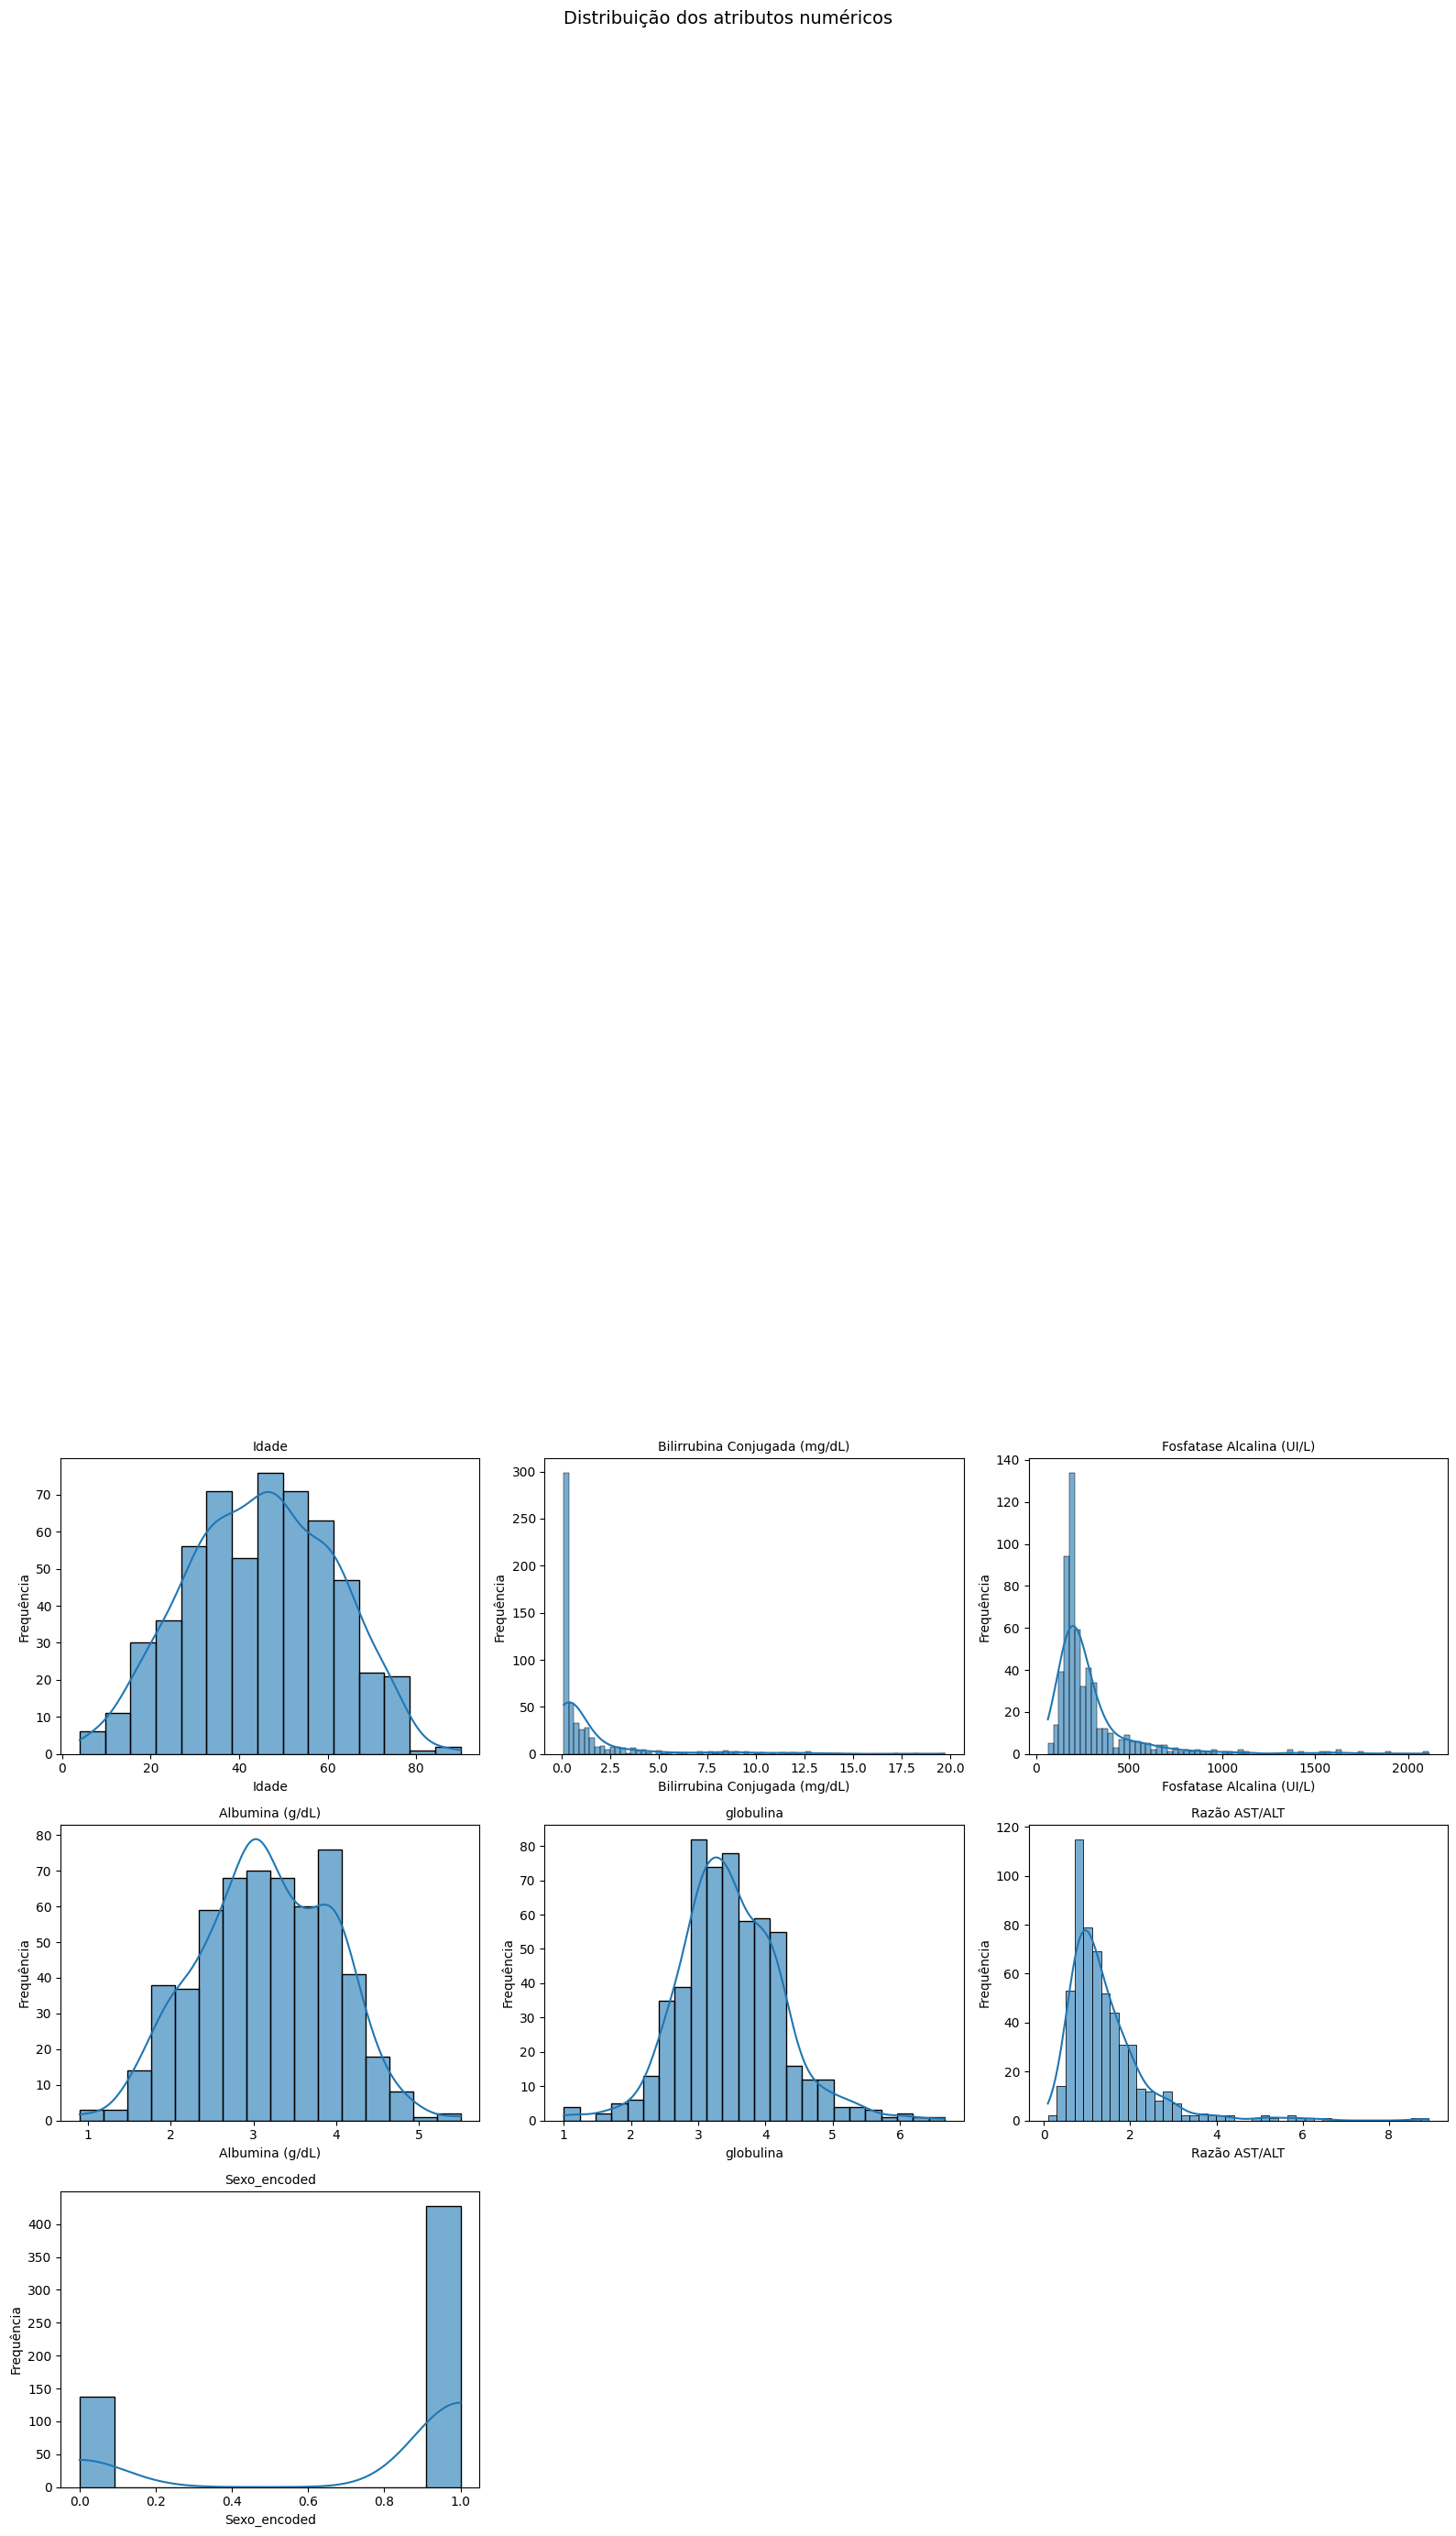

In [58]:
num_cols = len(X)
num_rows = math.ceil(num_cols / 3)

plt.figure(figsize=(16, 4 * num_rows))

for i, col in enumerate(X, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(
        data=X,
        x=col,
        kde=True,
        alpha=0.6
    )
    plt.title(col, fontsize=10)
    plt.xlabel(col)
    plt.ylabel('Frequ√™ncia')

plt.suptitle('Distribui√ß√£o dos atributos num√©ricos', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

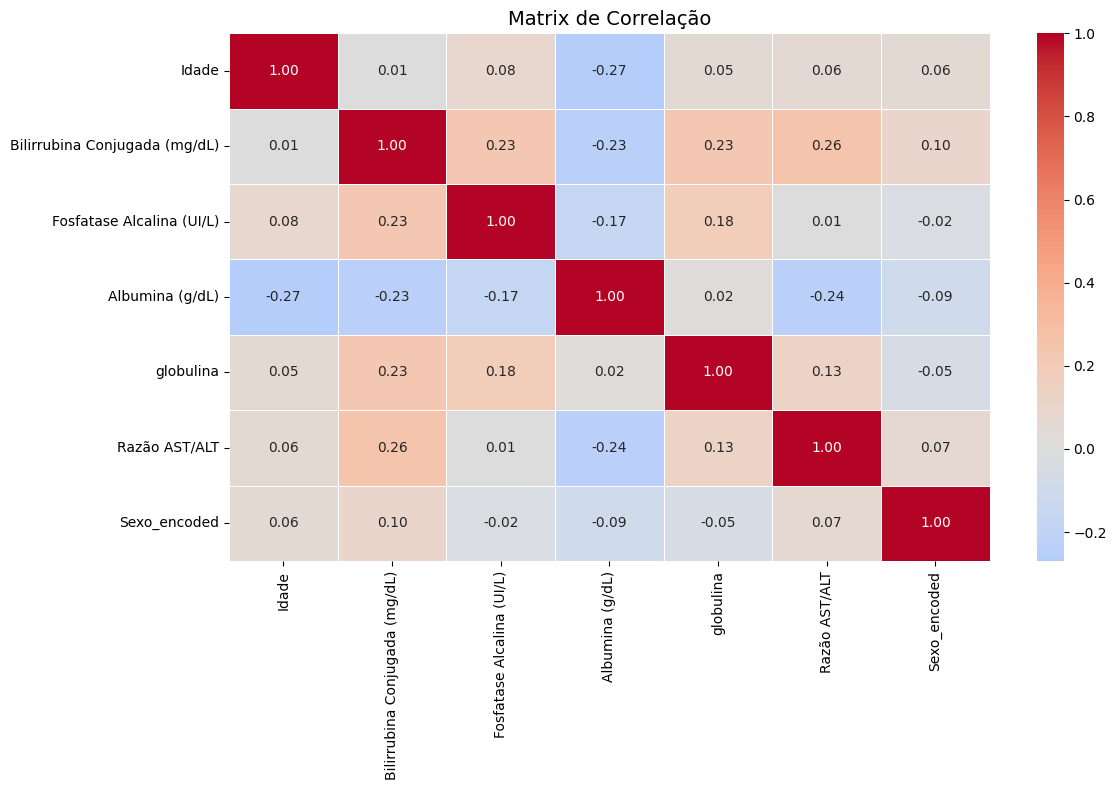

In [59]:
# Calcula a matriz de correla√ß√£o
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
# Cria o mapa de calor com anota√ß√µes
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)


# T√≠tulo
plt.title('Matrix de Correla√ß√£o', fontsize=14)
plt.tight_layout()
plt.show()

Ap√≥s as adequa√ß√µes realizadas, a matriz de correla√ß√£o apresenta valores muito mais favor√°veis aos modelos de an√°lise preditiva.

### Normaliza√ß√£o/Escalonamento
Como o dataset apresenta vari√°veis com ampla varia√ß√£o de escala e presen√ßa de outliers ‚Äî como visto nos boxplots e na an√°lise estat√≠stica ‚Äî, optei por utilizar o RobustScaler para a padroniza√ß√£o dos dados num√©ricos.

Diferente do StandardScaler (que utiliza m√©dia e desvio padr√£o), o RobustScaler utiliza a mediana e o intervalo interquartil (IQR), sendo mais resistente √† influ√™ncia de valores extremos. Esse comportamento √© muito √∫til em dados m√©dicos, onde outliers podem representar condi√ß√µes cl√≠nicas reais e de grande import√¢ncia.

Essa padroniza√ß√£o garante que o modelo interprete corretamente as vari√°veis com diferentes escalas, sem que outliers distor√ßam o treinamento.

In [60]:
assim_metricas = [
    'Bilirrubina Conjugada (mg/dL)',
    'Fosfatase Alcalina (UI/L)',
    'Raz√£o AST/ALT']

# Inicializa o scaler
scaler = RobustScaler()

# Aplica o RobustScaler apenas nas colunas selecionadas
X_train[assim_metricas] = scaler.fit_transform(X_train[assim_metricas])
X_test[assim_metricas] = scaler.transform(X_test[assim_metricas])

### Balanceamento com SMOTE

Como h√° um desbalanceamento entre os estados hep√°ticos (existem mais indiv√≠duos doentes do que saud√°veis) foi aplicado o **oversampling** com **SMOTE** para ajustar o desbalanceamento e melhorar a capacidade do modelo de identificar corretamente ambas as classes, especialmente a minorit√°ria. Isso torna o sistema preditivo mais justo, sens√≠vel e √∫til na pr√°tica cl√≠nica.

In [61]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [62]:
print(f"Dimens√µes de X_train_res: {X_train_res.shape}")
print(f"Dimens√µes de X_test: {X_test.shape}")
print(f"Dimens√µes de y_train_res: {y_train_res.shape}")
print(f"Dimens√µes de y_test: {y_test.shape}")

Dimens√µes de X_train_res: (566, 7)
Dimens√µes de X_test: (170, 7)
Dimens√µes de y_train_res: (566,)
Dimens√µes de y_test: (170,)


# Conclus√£o

---

Este trabalho teve como objetivo preparar um conjunto de dados cl√≠nicos sobre doen√ßas hep√°ticas, por meio de an√°lise explorat√≥ria e pr√©-processamento, para posterior uso em modelos preditivos. Entre as hip√≥teses levantadas, considerou-se que pacientes mais velhos teriam maior risco de desenvolver doen√ßas hep√°ticas, e que marcadores sangu√≠neos espec√≠ficos apresentariam comportamentos distintos entre os grupos saud√°vel e doente.

A an√°lise n√£o confirmou algumas dessas rela√ß√µes, como a tend√™ncia de maior idade em pacientes doentes, al√©m de correla√ß√µes relevantes entre vari√°veis bioqu√≠micas (como ALT e AST, Albumina e Globulina). Com base nesses achados, foram realizadas transforma√ß√µes nos dados, como a cria√ß√£o de atributos derivados, exclus√£o de colunas altamente correlacionadas e aplica√ß√£o do RobustScaler para lidar com a presen√ßa de outliers.

O desbalanceamento de classes tamb√©m foi tratado com o uso de SMOTE, preparando a base para a constru√ß√£o de modelos supervisionados mais robustos e confi√°veis.

####Pacientes com n√≠veis elevados de bilirrubina e enzimas hep√°ticas (AST, ALT) t√™m maior probabilidade de apresentar doen√ßa hep√°tica?

---


De acordo com a visualiza√ß√£o dos gr√°ficos de dispers√£o, h√° uma rela√ß√£o clara entre n√≠veis mais elevados de bilirrubina (conjugada) e as enzimas hep√°ticas (AST e ALT) e a probabilidade do paciente estar doente. H√° maior concentra√ß√£o de pontos "Doente" quando tanto a Bilirrubina Conjugada quanto as enzimas est√£o elevadas ‚Äî especialmente o grupo com valores mais extremos de bilirrubina e enzimas hep√°ticas. Enquanto pacientes saud√°veis est√£o concentrados na parte inferior esquerda do gr√°fico.


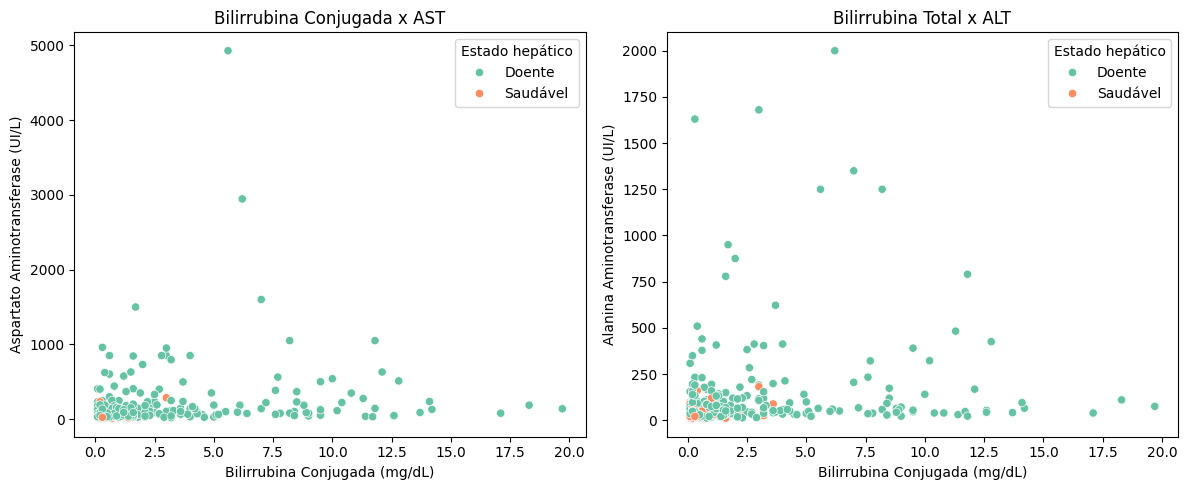

In [63]:
plt.figure(figsize=(12, 5))

# Total Bilirubin vs AST
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=bronze,
    x='Bilirrubina Conjugada (mg/dL)', y='Aspartato Aminotransferase (UI/L)',
    hue='Estado hep√°tico', palette='Set2'
)
plt.title('Bilirrubina Conjugada x AST')

# Total Bilirubin vs ALT
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=bronze,
    x='Bilirrubina Conjugada (mg/dL)', y='Alanina Aminotransferase (UI/L)',
    hue='Estado hep√°tico', palette='Set2'
)
plt.title('Bilirrubina Total x ALT')

plt.tight_layout()
plt.show()

#### Existe rela√ß√£o entre o n√≠vel de albumina e a presen√ßa da doen√ßa hep√°tica?

---
H√° evid√™ncia visual de associa√ß√£o negativa entre o n√≠vel de albumina e a presen√ßa de doen√ßa hep√°tica. Por√©m, a sobreposi√ß√£o das distribui√ß√µes indica que nem todos os doentes t√™m baixa albumina, e nem todos os saud√°veis t√™m alta albumina. Logo, a rela√ß√£o √© relevante, mas moderada. A albumina pode contribuir para o diagn√≥stico, mas n√£o √© suficiente sozinha.



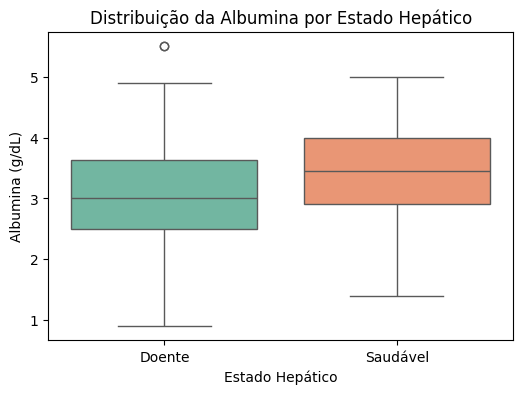

In [64]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=bronze,
    x='Estado hep√°tico',
    y='Albumina (g/dL)',
    hue='Estado hep√°tico',
    palette='Set2',
    legend=False
)
plt.title('Distribui√ß√£o da Albumina por Estado Hep√°tico')
plt.ylabel('Albumina (g/dL)')
plt.xlabel('Estado Hep√°tico')
plt.show()

####Pacientes mais velhos tendem a apresentar um risco maior para o desenvolvimento de doen√ßa hep√°tica?

---
A diferen√ßa entre os grupos de pacientes doentes e saud√°veis n√£o √© suficientemente expressiva para confirmar a hip√≥tese de que pacientes mais velhos t√™m maior propens√£o √† doen√ßa hep√°tica.


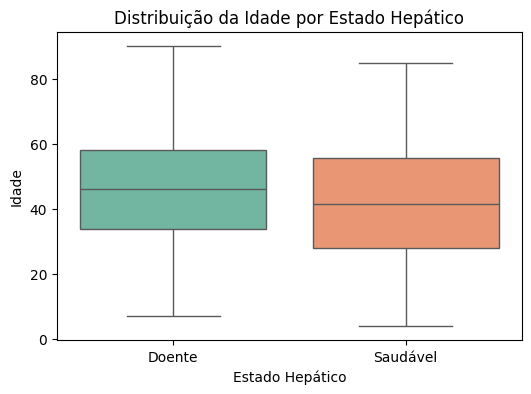

In [65]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=bronze,
    x='Estado hep√°tico',
    y='Idade',
    hue='Estado hep√°tico',
    palette='Set2',
    legend=False
)
plt.title('Distribui√ß√£o da Idade por Estado Hep√°tico')
plt.ylabel('Idade')
plt.xlabel('Estado Hep√°tico')
plt.show()

#### Medidas como a propor√ß√£o entre albumina e globulina s√£o bons indicadores para diferenciar pacientes saud√°veis de doentes?

---
Com base no gr√°fico violino, a **Raz√£o Albumina/Globulina** mostra diferen√ßas vis√≠veis entre pacientes saud√°veis e doentes, sugerindo que pode ser um bom indicador complementar, mas n√£o √© um marcador isoladamente determinante. Nota-se que a raz√£o acima de 2.5 s√≥ est√° presente em pacientes doentes.


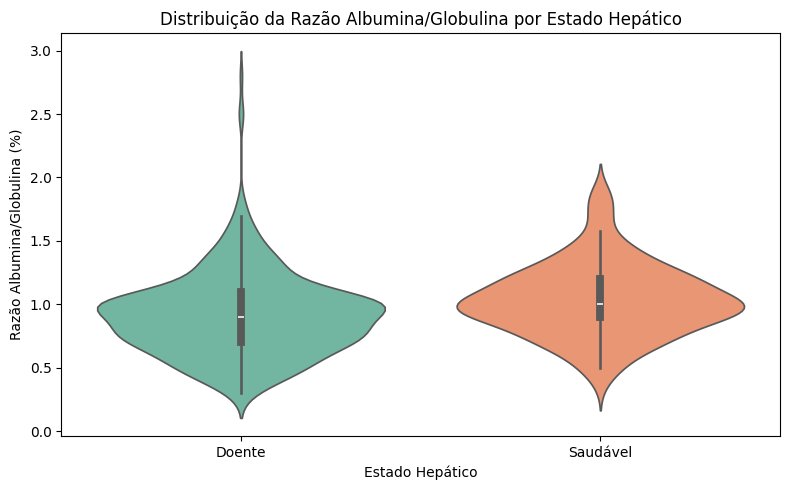

In [66]:
plt.figure(figsize=(8, 5))
sns.violinplot(
    data=bronze,
    x='Estado hep√°tico',
    y='Raz√£o Albumina/Globulina (%)',
    hue='Estado hep√°tico',
    palette='Set2'
)

plt.title('Distribui√ß√£o da Raz√£o Albumina/Globulina por Estado Hep√°tico')
plt.xlabel('Estado Hep√°tico')
plt.ylabel('Raz√£o Albumina/Globulina (%)')
plt.tight_layout()
plt.show()